In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

### Explore the data

In [2]:
file_path = "GTZAN/genres_original/classical/classical.00001.wav"
data, sr = librosa.load(file_path)

In [3]:
data, sr

(array([-0.01138306, -0.00216675,  0.01687622, ..., -0.02954102,
        -0.0378418 , -0.03924561], dtype=float32),
 22050)

In [4]:
IPython.display.Audio(data, rate=sr)

In [5]:
pd.DataFrame(data)

,0
0,-0.011383
1,-0.002167
2,0.016876
3,0.015503
4,0.004089
...,...
661789,-0.002228
661790,-0.019897
661791,-0.029541
661792,-0.037842


In [6]:
#read the features file:
df=pd.read_csv("GTZAN/features_30_sec.csv")
df.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### EDA on the data

#### data size

In [7]:
shape=df.shape
print(f"the data contain {shape[0]} rows and {shape[1]} columns")
print(f"the size of the data is {df.size}")

the data contain 1000 rows and 60 columns
the size of the data is 60000


#### list of features

In [8]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

#### data information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

#### missing values:

In [10]:
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

#### label encoder on the lable features:

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["label"])

LabelEncoder()

In [12]:
le.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [13]:
le.transform(df["label"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [14]:
df.label=le.transform(df["label"])

In [15]:
df["label"]

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int32

#### correlations:

In [16]:
print("inter-correlations")
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df.corr()
df_styled = corr.style.applymap(color_map)
df_styled

inter-correlations


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
length,1.000000,0.017426,0.073979,0.101801,0.116661,0.052175,0.121994,0.062503,0.118993,0.040363,0.106346,0.025562,0.113593,0.022029,0.109892,-0.046251,0.077283,0.060316,0.054666,0.127369,-0.086796,0.136095,0.058542,0.085642,-0.114049,0.081549,0.105022,0.062592,-0.121300,0.089809,0.114826,0.060114,-0.083152,0.096725,0.114684,0.054959,-0.052095,0.057638,0.168307,0.051005,-0.043836,0.084516,0.142020,0.038884,-0.059199,0.005673,0.110454,0.023164,-0.019677,0.025483,0.039179,0.003457,-0.025331,0.014822,0.010576,0.045884,0.014803,0.050338,-0.062194
chroma_stft_mean,0.017426,1.000000,-0.461729,0.499926,0.261544,0.615728,0.285926,0.517710,0.041088,0.598122,0.117139,0.554771,0.355920,0.031963,0.281150,-0.116567,0.465995,0.018477,0.659550,-0.125173,-0.598713,-0.052177,-0.054353,0.003765,0.264147,0.132253,-0.010085,0.038402,0.416877,0.101364,0.067508,0.066712,0.509776,-0.026696,0.116040,-0.151147,0.489229,-0.192695,0.072779,-0.301768,0.516690,-0.408530,-0.081445,-0.438212,0.417091,-0.444702,-0.143372,-0.440796,0.332359,-0.452955,-0.163474,-0.456298,0.269935,-0.478452,-0.089509,-0.501768,0.281965,-0.548577,0.366451
chroma_stft_var,0.073979,-0.461729,1.000000,-0.078777,0.290138,-0.246441,0.305819,-0.036896,0.346907,-0.168721,0.383134,-0.470186,0.169289,-0.006378,0.047447,0.086584,0.020981,-0.079209,-0.343372,0.367570,0.118888,0.353811,0.412857,0.421817,-0.252334,0.394627,0.354068,0.414076,-0.209684,0.447260,0.277560,0.433032,-0.318189,0.450482,0.206969,0.469733,-0.292359,0.421070,0.231738,0.395838,-0.359185,0.382765,0.314236,0.383944,-0.275502,0.365766,0.273446,0.372656,-0.311178,0.361752,0.205117,0.389468,-0.239597,0.378200,0.184323,0.365291,-0.231715,0.333581,-0.082835
rms_mean,0.101801,0.499926,-0.078777,1.000000,0.607399,0.510154,0.324077,0.530017,0.099830,0.537902,0.200083,0.332163,0.319304,0.064440,0.893898,-0.009166,0.789994,-0.052634,0.807239,-0.179467,-0.484057,-0.009069,0.139513,-0.024116,0.008731,0.180446,0.108939,0.068321,0.125682,0.213669,0.167750,0.114015,0.178947,0.083730,0.216109,0.011487,0.186127,-0.005768,0.117318,-0.118258,0.183280,-0.195578,0.013036,-0.236572,0.163009,-0.216350,-0.011154,-0.214653,0.083936,-0.160347,-0.029562,-0.163490,0.118239,-0.164834,0.031297,-0.207680,0.124413,-0.252434,0.213968
rms_var,0.116661,0.261544,0.290138,0.607399,1.000000,0.347831,0.583353,0.402333,0.320793,0.368570,0.417880,0.156530,0.568643,0.084849,0.585318,0.123557,0.789910,-0.118671,0.326590,0.276735,-0.368384,0.348277,0.297067,0.351018,-0.234197,0.465319,0.265403,0.359638,-0.155544,0.533171,0.312285,0.357660,-0.126337,0.407201,0.328440,0.329269,-0.071458,0.287186,0.266139,0.180124,-0.077560,0.106692,0.229806,0.099020,-0.037588,0.059604,0.211396,0.062595,-0.093893,0.091863,0.168169,0.100234,-0.002585,0.058050,0.186953,0.049879,0.029364,0.012087,0.107572
spectral_centroid_mean,0.052175,0.615728,-0.246441,0.510154,0.347831,1.000000,0.520548,0.904435,0.011256,0.979637,0.198031,0.874749,0.671771,0.053695,0.316211,-0.013444,0.559647,-0.025764,0.721006,-0.201153,-0.940180,-0.017894,0.188000,-0.099545,-0.136810,0.153690,0.069132,-0.078022,0.017597,0.171060,0.215637,0.024782,0.134407,0.051892,0.288884,-0.066127,0.192896,-0.069192,0.152689,-0.143950,0.175123,-0.234021,0.051308,-0.220678,0.170910,-0.203427,0.022383,-0.204568,0.153

##### drop the first column

In [17]:
df.drop(columns=["filename"], inplace=True)

### split the data

In [18]:
# split the data:
#random split 80-20: 

X = df[df.columns.drop("label")]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2, # or train_size=.8
                                                    # to get same split every time
                                                    random_state=100) 

<AxesSubplot:>

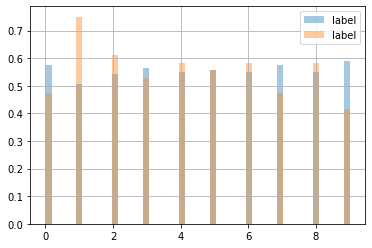

In [19]:
#check that we got similar distributions
y_train.hist(legend=True,bins=50, density=True, alpha=0.4)
y_test.hist(legend=True,bins=50, density=True, alpha=0.4)

### models:

In [20]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

clf.score(X_test,y_test)

C:\Users\lelda\.conda\envs\itc_data_course\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.285

In [21]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)
score = gnb.score(X_test, y_test)
score

Wall time: 4.99 ms


0.4

In [22]:
# one random forest
from sklearn.ensemble import RandomForestClassifier
modelRF15 = RandomForestClassifier(max_depth=15, n_estimators=100) 
modelRF15.fit(X_train, y_train)
y_pred=modelRF15.predict(X_test)
print(f"--- for depth of 15 ---")
print("accurecy_score: ", accuracy_score(y_test, y_pred))
print("score: ",modelRF15.score(X_test,y_test),"\n")

--- for depth of 15 ---
accurecy_score:  0.745
score:  0.745 



In [77]:
from sklearn.ensemble import RandomForestClassifier
params_dict_rf = [{'max_depth': [14,15,16,17], 
                    'n_estimators': [100,120,150,160,170]}]

modelRF = GridSearchCV(RandomForestClassifier(random_state=29), 
                       params_dict_rf,  
                       cv=5, 
                       verbose=10,
                       n_jobs=-1)
modelRF.fit(X_train, y_train)

print('Best parameters set found on validation set:', modelRF.best_params_)
print(f'Best validation score: {modelRF.best_score_}')

means = modelRF.cv_results_['mean_test_score']
stds = modelRF.cv_results_['std_test_score']
params = modelRF.cv_results_['params']
print('\nGrid scores on validation set:')
for mean_rf, std_rf, params_rf in zip(means, stds, params):
    print(f'{mean_rf:.3f} (+/-{(std_rf * 2):.3f}) for {params_rf}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters set found on validation set: {'max_depth': 15, 'n_estimators': 120}
Best validation score: 0.7924999999999999

Grid scores on validation set:
0.769 (+/-0.059) for {'max_depth': 14, 'n_estimators': 100}
0.782 (+/-0.059) for {'max_depth': 14, 'n_estimators': 120}
0.787 (+/-0.061) for {'max_depth': 14, 'n_estimators': 150}
0.791 (+/-0.066) for {'max_depth': 14, 'n_estimators': 160}
0.787 (+/-0.063) for {'max_depth': 14, 'n_estimators': 170}
0.775 (+/-0.065) for {'max_depth': 15, 'n_estimators': 100}
0.792 (+/-0.044) for {'max_depth': 15, 'n_estimators': 120}
0.789 (+/-0.065) for {'max_depth': 15, 'n_estimators': 150}
0.784 (+/-0.068) for {'max_depth': 15, 'n_estimators': 160}
0.779 (+/-0.070) for {'max_depth': 15, 'n_estimators': 170}
0.772 (+/-0.054) for {'max_depth': 16, 'n_estimators': 100}
0.790 (+/-0.041) for {'max_depth': 16, 'n_estimators': 120}
0.785 (+/-0.055) for {'max_depth': 16, 'n_estimators': 150}


In [87]:
modelRF15 = RandomForestClassifier(max_depth=15, n_estimators=120, random_state=29) 
modelRF15.fit(X_train, y_train)
y_pred=modelRF15.predict(X_test)
print(f"--- for depth of 15 and 120 estimators---")
print("accurecy_score: ", accuracy_score(y_test, y_pred))
print("score: ",modelRF15.score(X_test,y_test),"\n")

--- for depth of 15 and 120 estimators---
accurecy_score:  0.765
score:  0.765 



In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70        17
           1       0.96      0.89      0.92        27
           2       0.87      0.59      0.70        22
           3       0.82      0.95      0.88        19
           4       0.88      0.67      0.76        21
           5       0.83      0.75      0.79        20
           6       0.90      0.86      0.88        21
           7       0.75      0.71      0.73        17
           8       0.58      0.71      0.64        21
           9       0.53      0.67      0.59        15

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.79      0.77      0.77       200



In [89]:
me=classification_report(y_test, y_pred)

In [94]:
from sklearn.metrics import classification_report
classificationReport = classification_report(y_test, y_pred)

plot_classification_report(classificationReport)

NameError: name 'plot_classification_report' is not defined

In [ ]:
#for testing, not important

In [42]:
from sklearn.tree import DecisionTreeClassifier
params_dict_dt = [{'max_depth': [14,16, 20]}]

modelDT = GridSearchCV(DecisionTreeClassifier(), 
                       params_dict_dt,  
                       cv=5, 
                       verbose=10,
                       n_jobs=-1)
modelDT.fit(X_train, y_train)

print('Best parameters set found on validation set:', modelDT.best_params_)
print(f'Best validation score: {modelDT.best_score_}')

means = modelDT.cv_results_['mean_test_score']
stds = modelDT.cv_results_['std_test_score']
params = modelDT.cv_results_['params']
print('\nGrid scores on validation set:')
for mean_dt, std_dt, params_dt in zip(means, stds, params):
    print(f'{mean_dt:.3f} (+/-{(std_dt * 2):.3f}) for {params_dt}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters set found on validation set: {'max_depth': 14}
Best validation score: 0.5900000000000001

Grid scores on validation set:
0.590 (+/-0.094) for {'max_depth': 14}
0.586 (+/-0.094) for {'max_depth': 16}
0.581 (+/-0.079) for {'max_depth': 20}


In [26]:
modelDT16 = DecisionTreeClassifier(max_depth=16) 
modelDT16.fit(X_train, y_train)
y_pred=modelDT16.predict(X_test)
print(f"--- for depth of 16 ---")
print("accurecy_score: ", accuracy_score(y_test, y_pred))
print("score: ",modelDT16.score(X_test,y_test),"\n")

--- for depth of 16 ---
accurecy_score:  0.555
score:  0.555 



In [27]:
modelDT3 = DecisionTreeClassifier(max_depth=3) 
modelDT3.fit(X_train, y_train)
y_pred=modelDT3.predict(X_test)
print(f"--- for depth of 3 ---")
print("accurecy_score: ", accuracy_score(y_test, y_pred))
print("score: ",modelDT3.score(X_test,y_test),"\n")

--- for depth of 3 ---
accurecy_score:  0.43
score:  0.43 



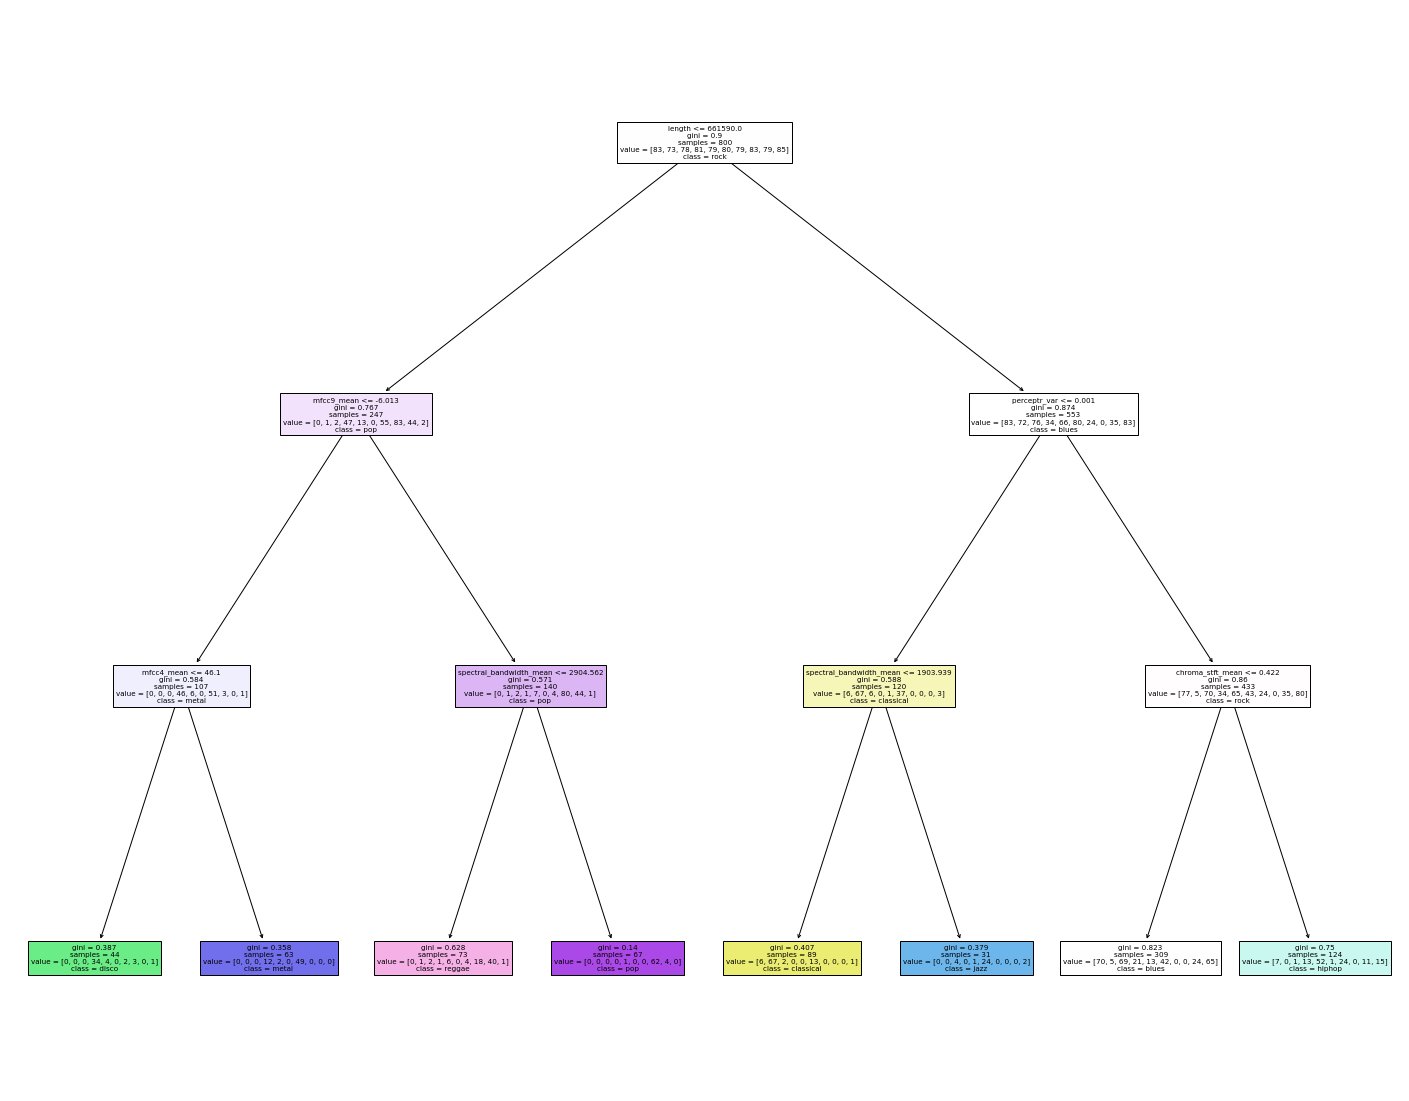

In [28]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelDT3, 
                   feature_names=df.columns,  
                   class_names=le.classes_,
                   filled=True)